In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read the data

In [2]:
pd.set_option('display.max_columns',200)
names = ['2019Q1', '2019Q2', '2019Q3']
data_list = []
for name in names:
    data = pd.read_table('C:/Users/Owner/Desktop/Lending Club/data/LoanStats_securev1_'+name+'.csv', sep=',', low_memory=False)
    data_list.append(data)
loan = pd.concat(data_list, ignore_index=True)
print(loan.shape)
loan.head()
    

(389849, 150)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,149328059,NaN,13500,13500,13500.0,36 months,7.56%,420.31,A,A3,Collaborative Practice RN,8 years,MORTGAGE,68000.0,Not Verified,2019/3/19,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,152xx,PA,15.74,0,2019/3/10,750,754,0,NaN,NaN,11,0,14471,30.60%,15,w,11456.49,11456.49,2510.52,2510.52,2043.51,467.01,0.0,0.0,0.0,2019/9/19,420.31,2019/10/19,2019/10/19,784,780,0,NaN,1,Individual,NaN,NaN,NaN,0,0,165690,1,1,0,1,24.0,19892,75.0,1,2,5547,47.0,47300,0,0,0,3,15063.0,10893.0,41.4,0,0,108.0,98,0,0,1,24.0,NaN,24.0,NaN,0,2,9,2,2,5,9,9,9,11,0.0,0,0,1,100.0,0.0,0,0,224894,34363,18600,26384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,149420408,NaN,20000,20000,20000.0,36 months,17.97%,722.75,D,D1,Computer Specialist,10+ years,RENT,110000.0,Not Verified,2019/3/19,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,100xx,NY,23.44,0,2019/9/3,675,679,0,39.0,NaN,12,0,13362,50.80%,29,w,17363.51,17363.51,4296.57,4296.57,2636.49,1660.08,0.0,0.0,0.0,2019/9/19,722.75,2019/10/19,2019/10/19,644,640,0,NaN,1,Individual,NaN,NaN,NaN,0,0,247498,2,4,1,1,4.0,222840,96.0,3,3,3779,82.0,26300,0,4,0,4,20625.0,1721.0,68.7,0,0,186.0,103,4,4,0,101.0,NaN,NaN,NaN,0,1,4,1,1,21,7,7,4,12,0.0,0,0,4,90.9,0.0,0,0,256497,247498,5500,218203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,149453166,NaN,1600,1600,1575.0,36 months,11.02%,52.40,B,B2,

In [3]:
loan['loan_status'].value_counts()

Current               336129
Issued                 27913
Fully Paid             18451
Late (31-120 days)      3085
In Grace Period         1739
Late (16-30 days)       1202
Charged Off             1133
Default                  197
Name: loan_status, dtype: int64

In [4]:
drop_names=['Current','Issued','Late (31-120 days)','In Grace Period','Late (16-30 days)']
for name in drop_names:
    indice = loan[loan['loan_status']==name].index
    loan = loan.drop(indice, axis=0)
loan['loan_status'].value_counts()

Fully Paid     18451
Charged Off     1133
Default          197
Name: loan_status, dtype: int64

In [5]:
names = ['id', 'member_id', 'funded_amnt', 'funded_amnt_inv','int_rate', 'installment', 'sub_grade',
 'emp_title', 'issue_d', 'pymnt_plan','url', 'title', 'zip_code', 'addr_state', 'dti',
 'earliest_cr_line',  'initial_list_status', 'out_prncp','out_prncp_inv', 'total_pymnt', 
 'total_pymnt_inv','total_rec_prncp', 'total_rec_int', 'total_rec_late_fee','recoveries',
 'collection_recovery_fee', 'last_pymnt_d','last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d','collections_12_mths_ex_med']
loan = loan.drop(names, axis=1)
loan.head()

,loan_amnt,term,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
17,3025,36 months,C,3 years,RENT,30000.0,Source Verified,Fully Paid,NaN,debt_consolidation,0,665,669,0,27.0,NaN,9,0,2885,43.70%,22,649,645,82.0,1,Individual,NaN,NaN,NaN,0,0,19021,0,3,0,1,16.0,16136,82.0,3,4,1530,72.0,6600,1,1,1,5,2378.0,59.0,97.6,0,0,164.0,149,7,7,3,9.0,NaN,7.0,82.0,1,2,4,2,5,7,6,12,4,9,0.0,0,0,3,90.9,100.0,0,0,26381,19021,2500,19781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
54,5000,36 months,D,< 1 year,RENT,42000.0,Not Verified,Fully Paid,NaN,other,4,665,669,0,21.0,NaN,4,0,1719,68.80%,8,679,675,21.0,1,Individual,NaN,NaN,NaN,0,0,1719,0,0,0,0,NaN,0,NaN,0,0,618,69.0,2500,0,0,0,0,430.0,781.0,68.8,0,0,NaN,143,27,27,0,27.0,21.0,NaN,21.0,0,4,4,4,7,0,4,7,4,4,0.0,0,3,0,50.0,25.0,0,0,2500,1719,2500,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
55,12000,60 months,B,< 1 year,OWN,89000.0,Not Verified,Fully Paid,NaN,home_improvement,0,730,734,4,NaN,105.0,11,1,8977,25.60%,21,679,675,NaN,1,Individual,NaN,NaN,NaN,0,0,66081,0,7,1,1,11.0,57104,57.0,1,1,5154,40.0,35000,3,3,9,2,6007.0,25523.0,26.0,0,0,238.0,145,7,7,2,7.0,NaN,0.0,NaN,0,3,3,3,4,11,4,8,3,11,0.0,0,0,2,95.2,0.0,1,0,114536,66081,34500,79536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
65,3000,36 months,C,10+ years,RENT,50000.0,Not Verified,Fully Paid,NaN,credit_card,0,680,684,0,52.0,NaN,8,0,7542,41.70%,23,674,670,52.0,1,Individual,NaN,NaN,NaN,0,0,25605,0,1,0,1,22.0,18063,75.0,0,1,482,61.0,18100,1,3,0,2,3201.0,7518.0,6.0,0,0,199.0,231,19,19,2,25.0,NaN,22.0,NaN,1,1,5,2,3,5,7,16,5,8,0.0,0,0,0,95.7,0.0,0,0,42245,25605,8000,24145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
69,17500,36 months,C,5 years,RENT,82000.0,Source Verified,Fully Paid,NaN

In [6]:
null_cols = loan.isna().sum(axis=0).sort_values(ascending=False)/loan.shape[0]
null_cols[null_cols>0.7]

hardship_reason                               1.000000
hardship_amount                               1.000000
hardship_type                                 1.000000
hardship_status                               1.000000
deferral_term                                 1.000000
desc                                          1.000000
hardship_last_payment_amount                  1.000000
hardship_payoff_balance_amount                1.000000
orig_projected_additional_accrued_interest    1.000000
hardship_loan_status                          1.000000
hardship_dpd                                  1.000000
hardship_length                               1.000000
payment_plan_start_date                       1.000000
hardship_end_date                             1.000000
hardship_start_date                           1.000000
settlement_percentage                         0.997826
settlement_term                               0.997826
debt_settlement_flag_date                     0.997826
settlement

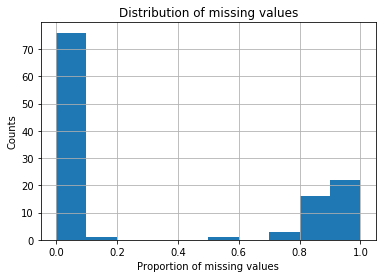

In [7]:
null_cols.hist()
plt.xlabel('Proportion of missing values')
plt.ylabel('Counts')
plt.title('Distribution of missing values')
plt.show()

In [8]:
loan = loan.dropna(axis=1, how='any', thresh=loan.shape[0]*0.7)
loan.head()

,loan_amnt,term,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
17,3025,36 months,C,3 years,RENT,30000.0,Source Verified,Fully Paid,debt_consolidation,0,665,669,0,9,0,2885,43.70%,22,649,645,1,Individual,0,0,19021,0,3,0,1,16.0,16136,82.0,3,4,1530,72.0,6600,1,1,1,5,2378.0,59.0,97.6,0,0,164.0,149,7,7,3,9.0,7.0,1,2,4,2,5,7,6,12,4,9,0.0,0,0,3,90.9,100.0,0,0,26381,19021,2500,19781,N,N
54,5000,36 months,D,< 1 year,RENT,42000.0,Not Verified,Fully Paid,other,4,665,669,0,4,0,1719,68.80%,8,679,675,1,Individual,0,0,1719,0,0,0,0,NaN,0,NaN,0,0,618,69.0,2500,0,0,0,0,430.0,781.0,68.8,0,0,NaN,143,27,27,0,27.0,NaN,0,4,4,4,7,0,4,7,4,4,0.0,0,3,0,50.0,25.0,0,0,2500,1719,2500,0,N,N
55,12000,60 months,B,< 1 year,OWN,89000.0,Not Verified,Fully Paid,home_improvement,0,730,734,4,11,1,8977,25.60%,21,679,675,1,Individual,0,0,66081,0,7,1,1,11.0,57104,57.0,1,1,5154,40.0,35000,3,3,9,2,6007.0,25523.0,26.0,0,0,238.0,145,7,7,2,7.0,0.0,0,3,3,3,4,11,4,8,3,11,0.0,0,0,2,95.2,0.0,1,0,114536,66081,34500,79536,N,N
65,3000,36 months,C,10+ years,RENT,50000.0,Not Verified,Fully Paid,credit_card,0,680,684,0,8,0,7542,41.70%,23,674,670,1,Individual,0,0,25605,0,1,0,1,22.0,18063,75.0,0,1,482,61.0,18100,1,3,0,2,3201.0,7518.0,6.0,0,0,199.0,231,19,19,2,25.0,22.0,1,1,5,2,3,5,7,16,5,8,0.0,0,0,0,95.7,0.0,0,0,42245,25605,8000,24145,N,N
69,17500,36 months,C,5 years,RENT,82000.0,Source Verified,Fully Paid,debt_consolidation,1,670,674,0,12,0,15296,83.60%,27,674,670,1,Individual,0,0,141781,0,6,0,2,16.0,126485,63.0,0,0,4624,71.0,18300,2,0,0,2,11815.0,2113.0,87.9,0,0,153.0,143,29,16,0,55.0,16.0,1,4,5,4,4,21,6,6,5,12,0.0,0,1,0,92.6,75.0,0,0,131463,141781,17400,113163,N,N


In [9]:
#loan['revol_util'] = loan['revol_util'].str.replace('%','').astype('float')

loan['emp_length'] = loan['emp_length'].str.replace(' year','')
loan['emp_length'] = loan['emp_length'].str.replace('s','')
loan['emp_length'] = loan['emp_length'].replace(['10+','< 1'],['11','0'])
loan['emp_length'].fillna(0)

loan['income_vs_loan'] = loan['annual_inc']/loan['loan_amnt']

loan['delinq_2yrs']=loan['delinq_2yrs'].astype('int')
loan['revol_bal']=loan['revol_bal'].astype('int')
loan['total_acc']=loan['total_acc'].astype('int')

loan['loan_status'].replace({'Fully Paid':0,'Default':1,'Charged Off':1}, inplace=True)

In [14]:
num_features = []
obj_features = []
for feature in loan.columns.values:
    if loan[feature].dtype == 'object':
        obj_features.append(feature)
    else:
        num_features.append(feature)

#Imputed = pd.DataFrame(KNN(k=6).fit_transform(loan[num_features]))
#Imputed.columns = num_features

Imputed = pd.read_csv('C:/Users/Owner/Desktop/Lending Club/data/imputed.csv')
Imputed = Imputed.drop(Imputed.columns[0], axis=1)
Imputed['loan_status'] = Imputed['loan_status'].astype('int')
loan = loan.drop(num_features, axis=1)
loan.reset_index(drop=True, inplace=True)
for feature in Imputed.columns.values:
    loan.insert(loc=len(loan.columns), column=feature, value=Imputed[feature],allow_duplicates=True)
loan.head()

,term,grade,emp_length,home_ownership,verification_status,purpose,revol_util,application_type,hardship_flag,debt_settlement_flag,loan_amnt,emp_length,annual_inc,loan_status,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,income_vs_loan
0,36 months,C,3,RENT,Source Verified,debt_consolidation,43.70%,Individual,N,N,3025,3,30000.0,0,0,665,669,0,9,0,2885,43.7,22,649,645,1,0,0,19021,0,3,0,1,16.00000,16136,82.000000,3,4,1530,72.0,6600,1,1,1,5,2378.0,59.0,97.6,0,0,164.000000,149,7,7,3,9.0,7.000000,1,2,4,2,5,7,6,12,4,9,0,0,0,3,90.9,100.0,0,0,26381,19021,2500,19781,9.917355
1,36 months,D,0,RENT,Not Verified,other,68.80%,Individual,N,N,5000,0,42000.0,0,4,665,669,0,4,0,1719,68.8,8,679,675,1,0,0,1719,0,0,0,0,46.62556,0,51.385627,0,0,618,69.0,2500,0,0,0,0,430.0,781.0,68.8,0,0,79.382983,143,27,27,0,27.0,8.533424,0,4,4,4,7,0,4,7,4,4,0,0,3,0,50.0,25.0,0,0,2500,1719,2500,0,8.400000
2,60 months,B,0,OWN,Not Verified,home_improvement,25.60%,Individual,N,N,12000,0,89000.0,0,0,730,734,4,11,1,8977,25.6,21,679,675,1,0,0,66081,0,7,1,1,11.00000,57104,57.000000,1,1,5154,40.0,35000,3,3,9,2,6007.0,25523.0,26.0,0,0,238.000000,145,7,7,2,7.0,0.000000,0,3,3,3,4,11,4,8,3,11,0,0,0,2,95.2,0.0,1,0,114536,66081,34500,79536,7.416667
3,36 months,C,11,RENT,Not Verified,credit_card,41.70%,Individual,N,N,3000,11,50000.0,0,0,680,684,0,8,0,7542,41.7,23,674,670,1,0,0,25605,0,1,0,1,22.00000,18063,75.000000,0,1,482,61.0,18100,1,3,0,2,3201.0,7518.0,6.0,0,0,199.000000,231,19,19,2,25.0,22.000000,1,1,5,2,3,5,7,16,5,8,0,0,0,0,95.7,0.0,0,0,42245,25605,8000,24145,16.666667
4,36 months,C,5,RENT,Source Verified,debt_consolidation,83.60%,Individual,N,N,17500,5,82000.0,0,1,670,674,0,12,0,15296,83.6,27,674,670,1,0,0,141781,0,6,0,2,16.00000,126485,63.000000,0,0,4624,71.0,18300,2,0,0,2,11815.0,2113.0,87.9,0,0,153.000000,143,29,16,0,55.0,16.000000,1,4,5,4,4,21,6,6,5,12,0,0,1,0,92.6,75.0,0,0,131463,141781,17400,113163,4.685714
